<a href="https://colab.research.google.com/github/gsujal421/Exploratory-Data-Analysis--Netflix/blob/main/Netflix_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
from google.colab import files
uploaded= files.upload()

Saving netflix.csv to netflix.csv


#Importing essential libraries for data manipulation and visualization

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

#Load the dataset from the CSV file

In [111]:
df=pd.read_csv('netflix.csv',lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


#Displaying summary information about the dataset

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


#Defining summary statistics to get a quick overview of numerical columns

In [113]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


# Checking for missing (null) values and duplicate rows in the dataset

In [134]:
print(df.duplicated().sum())
print(df.isnull().sum())

0
Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64


#Converting the 'date' column from string format to datetime format

In [115]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtype)

datetime64[ns]


In [116]:
df['Release_Date']=df['Release_Date'].dt.year
print(df['Release_Date'])

0       2021
1       2022
2       2022
3       2021
4       2021
        ... 
9822    1973
9823    2020
9824    2016
9825    2021
9826    1984
Name: Release_Date, Length: 9827, dtype: int32


#Drop irrelevant columns from the DataFrame

In [117]:
del df['Overview']
del df['Original_Language']
del df['Poster_Url']

In [118]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


#Categorize scores into popularity ratings

In [119]:
def categorize_score(score):
  if score > 8:
    return 'Popular'
  elif score >= 6:
    return 'Average'
  elif score >= 4:
    return 'Below Average'
  else:
    return 'Not_Good'

df['Vote_Average']=df['Vote_Average'].apply(categorize_score)

In [120]:
print(df['Vote_Average'])

0             Popular
1             Popular
2             Average
3             Average
4             Average
            ...      
9822          Average
9823         Not_Good
9824    Below Average
9825          Average
9826          Average
Name: Vote_Average, Length: 9827, dtype: object


In [121]:
df['Vote_Average'].value_counts()

,count
Vote_Average,
Average,6946
Below Average,2388
Popular,314
Not_Good,179


 # Clean up extra whitespaces from data

In [122]:
df['Genre']= df['Genre'].str.split(', ')
df=df.explode('Genre').reset_index(drop=True)

In [123]:
df['Genre']=df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25793 non-null  int32   
 1   Title         25793 non-null  object  
 2   Popularity    25793 non-null  float64 
 3   Vote_Count    25793 non-null  int64   
 4   Vote_Average  25793 non-null  object  
 5   Genre         25793 non-null  category
dtypes: category(1), float64(1), int32(1), int64(1), object(2)
memory usage: 932.8+ KB


In [125]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


# Data Visualization

What is the most frequent genre in the dataset?

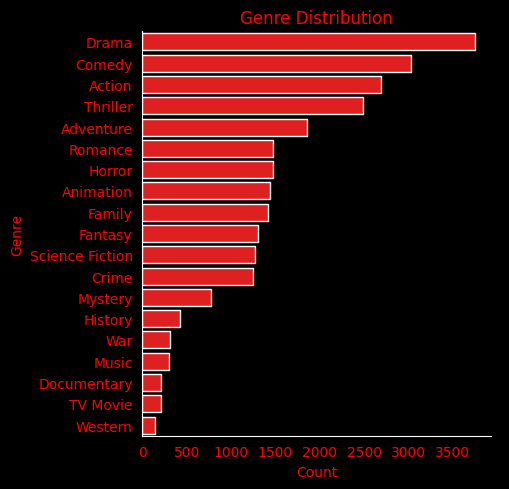

In [126]:
g=sns.catplot(y='Genre',data=df,kind='count',order=df['Genre'].value_counts().index,color='red')
plt.title('Genre Distribution',color='red')
g.fig.set_facecolor('black')
plt.xlabel('Count',color='red')
plt.ylabel('Genre',color='red')
plt.tight_layout()
plt.gca().set_facecolor('black')
plt.tick_params(axis='x', colors='red')
plt.tick_params(axis='y', colors='red')
plt.grid(False)
plt.show()

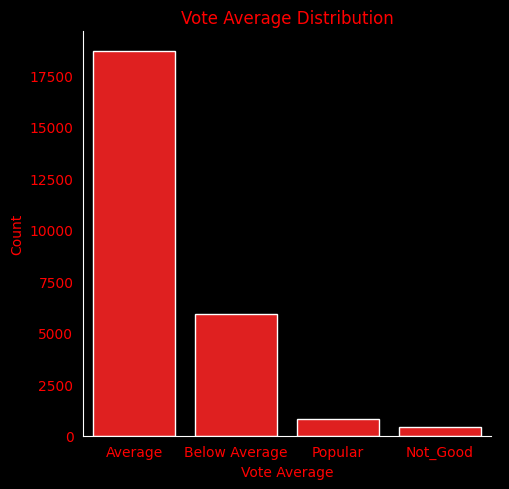

In [127]:
g=sns.catplot(x='Vote_Average',data=df,kind='count',order=df['Vote_Average'].value_counts().index,color='red')
g.fig.set_facecolor('black')
plt.title('Vote Average Distribution',color='red')
plt.xlabel('Vote Average',color='red')
plt.ylabel('Count',color='red')
plt.gca().set_facecolor('black')
plt.tick_params(axis='x', colors='red')
plt.tick_params(axis='y', colors='red')
plt.grid(False)
plt.tight_layout()
plt.show()

What movie has the highest popularity?

In [128]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction


What movie has the lowest popularity?

In [129]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152,Average,Music
25788,2021,The United States vs. Billie Holiday,13.354,152,Average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,Average,History
25790,1984,Threads,13.354,186,Average,War
25791,1984,Threads,13.354,186,Average,Drama
25792,1984,Threads,13.354,186,Average,Science Fiction


In [130]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


In [131]:
df['Release_Date'].value_counts()

,count
Release_Date,
2021,1638
2018,1387
2017,1365
2019,1272
2016,1212
...,...
1920,4
1902,3
1925,2


In [132]:
most_movies_year = df['Release_Date'].value_counts().idxmin()
print(f"The year with the most movies filmed is: {most_movies_year}")

The year with the most movies filmed is: 1925


Which Year has Filmed most movies?

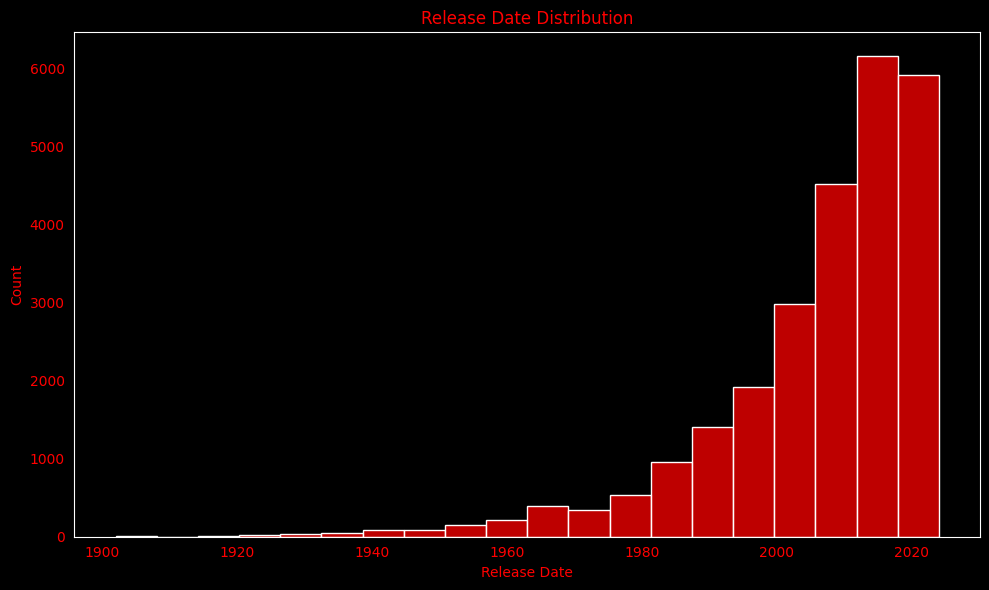

In [133]:
plt.figure(figsize=(10,6),facecolor='black')
sns.histplot(x='Release_Date',data=df,bins=20,color='red')
plt.title('Release Date Distribution',color='red')
plt.xlabel('Release Date',color='red')
plt.ylabel('Count',color='red')
plt.gca().set_facecolor('black')
plt.tick_params(axis='x', colors='red')
plt.tick_params(axis='y', colors='red')
plt.grid(False)
plt.tight_layout()
plt.show()

# Conclusion

1) What is the most frequent genre in the dataset?

Drama is the most common genre in our dataset.


2) Which genre has highest vote?

Drama has gain the highest popularity by fans via vote.


3) What movie has the highest popularity?

Spider-Man: No Way Home has the highest popularity, and its genres are action, adventure, and science-fiction.


4)What movie has the lowest popularity?

Threads has the lowest popularity, and its genres are war, drama, and science-fiction.


5) Which Year has Filmed most  movies?

2020 has filmed most movies in our dataset.